## Projeto da disciplina aprendizado supervisionado

### Aluno: Gabriel Angelo Bassetti Machado

#### 1.0 - Importando bibliotecas.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

from sklearn import metrics
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay

import joblib

#### 2.0 - Importando e tratando informações para utilização.

In [50]:
url = 'C:/Users/Gabriel-PC/Bootcamp-Data-science/Personal/7 - Aprendizado supervisionado/Projeto Disciplina/winequalityN.csv'

In [51]:
main_df = pd.read_csv(url)

In [52]:
main_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [53]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [54]:
main_df['type'].unique()

array(['white', 'red'], dtype=object)

In [55]:
# Filtrando a base dados somente para vinhos brancos

df_white = main_df[main_df['type'] == 'white']

In [56]:
df_white.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
df_white['type'].unique()

array(['white'], dtype=object)

In [58]:
# Criando a variável opinion, no qual será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário.

# Questão número 2 do projeto de disciplina.

df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_34284\3625608491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)


In [59]:
# Desconsiderando da análise a variável 'quality'.

# Questão número 2 do projeto de disciplina.

df_white.drop(columns= 'quality', inplace= True)

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_34284\2621709859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white.drop(columns= 'quality', inplace= True)


In [60]:
df_white.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [61]:
df_white['opinion'].unique()

array([1, 0], dtype=int64)

In [62]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  opinion               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


#### Respondendo a questão 3:

Variáveis discretas: ['free sulfur dioxide','total sulfur dioxide','opinion']

Variáveis categóricas: ['type','opinion']

Variáveis contínuas: ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

In [63]:
# Questão 3 - Médias e desvios

df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,0.665169
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [64]:
# report_df_white = ProfileReport(df_white)
# report_df_white

In [65]:
# filtrando linhas com valores nulos

df_white = df_white.dropna(axis=0)

In [66]:
# filtrando valores duplicados

df_white = df_white.drop_duplicates()

In [67]:
# Analisando DF com filtros

In [68]:
# # Podemos verificar dados sem valores duplicados e nulos

# # Porém ainda temos o problema de nossa coluna target desbalanceada

# report_df_white = ProfileReport(df_white)
# report_df_white

#### 3.0 Construindo modelos

3.1 - Preparando os dados para utilização:

- Divisão de treino e teste;
- Padronização;
- Variáveis;
- Funções utilizadas.

In [69]:
X = df_white[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide']]
y = df_white['opinion']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30, random_state= 42, stratify= y) # 30% do dados para teste

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
k_folds = KFold(n_splits= 10)

In [73]:
def avg_kfold_cv(model, X_train, y_train, k_folds):
    
    scores_acc = cross_val_score(model, X_train, y_train, cv = k_folds, scoring= make_scorer(accuracy_score))

    print("\nCross Validation Scores - Accuracy: ", scores_acc)
    print("Média CV Score - Accuracy: ", scores_acc.mean())

    scores_pre = cross_val_score(model, X_train, y_train, cv = k_folds, scoring= make_scorer(precision_score))

    print("\nCross Validation Scores - Precision: ", scores_pre)
    print("Média CV Score - Precision: ", scores_pre.mean())

    scores_rec = cross_val_score(model, X_train, y_train, cv = k_folds, scoring= make_scorer(recall_score))

    print("\nCross Validation Scores - Recall: ", scores_rec)
    print("Média CV Score - Recall: ", scores_rec.mean())

    scores_f1 = cross_val_score(model, X_train, y_train, cv = k_folds, scoring= make_scorer(f1_score))

    print("\nCross Validation Scores - f1 Score: ", scores_f1)
    print("Média CV Score - f1 Score: ", scores_f1.mean())
    


3.2 Regressão logística

In [74]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [75]:
joblib.dump(lr,'lrarq.joblib')

['lrarq.joblib']

In [76]:
mod_carreg = joblib.load('lrarq.joblib')

In [77]:
yhat = lr.predict(X_test)

In [78]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))
print("f1-score Test:",metrics.f1_score(y_test,yhat, average='weighted'))

Accuracy Test: 0.6897717666948436
Precision Test: 0.7021484375
Recall Test: 0.9206145966709347
f1-score Test: 0.6434656981378631


In [79]:
result_lr = avg_kfold_cv(lr, X_train, y_train, k_folds)


Cross Validation Scores - Accuracy:  [0.69565217 0.67753623 0.72463768 0.64855072 0.68115942 0.70289855
 0.74637681 0.68115942 0.65942029 0.68363636]
Média CV Score - Accuracy:  0.690102766798419

Cross Validation Scores - Precision:  [0.71610169 0.71365639 0.73728814 0.6625     0.69135802 0.69736842
 0.7721519  0.70042194 0.68421053 0.67932489]
Média CV Score - Precision:  0.7054381924410668

Cross Validation Scores - Recall:  [0.90860215 0.87096774 0.92553191 0.90857143 0.9281768  0.9244186
 0.91959799 0.90710383 0.87640449 0.93604651]
Média CV Score - Recall:  0.9105421457265728

Cross Validation Scores - f1 Score:  [0.80094787 0.78450363 0.82075472 0.76626506 0.79245283 0.795
 0.83944954 0.79047619 0.76847291 0.78728606]
Média CV Score - f1 Score:  0.794560880840483


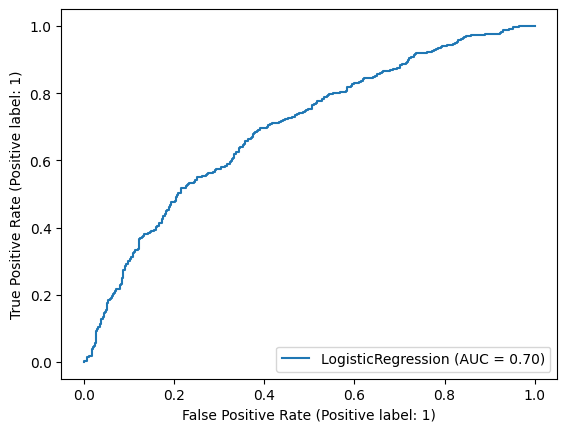

In [80]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

3.3 Árvore de Decisão

In [81]:
dTree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf= 50).fit(X_train,y_train)

# criterion="entropy"

In [82]:
yhat = dTree.predict(X_test)

In [83]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))
print("f1-score Test:",metrics.f1_score(y_test,yhat, average='weighted'))

Accuracy Test: 0.7117497886728656
Precision Test: 0.7439024390243902
Recall Test: 0.8591549295774648
f1-score Test: 0.696578579739773


In [84]:
result_dTree = avg_kfold_cv(dTree, X_train, y_train, k_folds)


Cross Validation Scores - Accuracy:  [0.71014493 0.72101449 0.75       0.69927536 0.64855072 0.65942029
 0.78623188 0.67028986 0.69565217 0.73454545]
Média CV Score - Accuracy:  0.7075125164690382

Cross Validation Scores - Precision:  [0.75238095 0.75348837 0.79899497 0.71698113 0.71212121 0.6969697
 0.83253589 0.73958333 0.75       0.74384236]
Média CV Score - Precision:  0.7496897923547545

Cross Validation Scores - Recall:  [0.84946237 0.87096774 0.84574468 0.86857143 0.77900552 0.80232558
 0.87437186 0.77595628 0.79213483 0.87790698]
Média CV Score - Recall:  0.833644727486095

Cross Validation Scores - f1 Score:  [0.7979798  0.80798005 0.82170543 0.78552972 0.74406332 0.74594595
 0.85294118 0.75733333 0.7704918  0.80533333]
Média CV Score - f1 Score:  0.7889303906874121


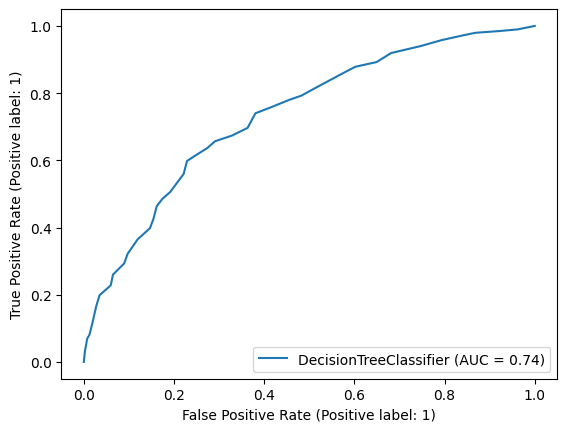

In [85]:
RocCurveDisplay.from_estimator(dTree, X_test, y_test)
plt.show()

3.4 SVM

In [86]:
SVM_met = svm.SVC(kernel='rbf').fit(X_train, y_train)

In [87]:
yhat = SVM_met.predict(X_test)

In [88]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))
print("f1-score Test:",metrics.f1_score(y_test,yhat, average='weighted'))

Accuracy Test: 0.7269653423499577
Precision Test: 0.75
Recall Test: 0.8796414852752881
f1-score Test: 0.7102772495894665


In [89]:
result_SVM = avg_kfold_cv(SVM_met, X_train, y_train, k_folds)


Cross Validation Scores - Accuracy:  [0.76811594 0.76449275 0.79710145 0.72463768 0.72463768 0.72826087
 0.7826087  0.73550725 0.73188406 0.75272727]
Média CV Score - Accuracy:  0.7509973649538868

Cross Validation Scores - Precision:  [0.78240741 0.78672986 0.82352941 0.73239437 0.75609756 0.73429952
 0.81447964 0.76960784 0.75742574 0.75242718]
Média CV Score - Precision:  0.7709398529259606

Cross Validation Scores - Recall:  [0.90860215 0.89247312 0.89361702 0.89142857 0.85635359 0.88372093
 0.90452261 0.8579235  0.85955056 0.90116279]
Média CV Score - Recall:  0.8849354845743663

Cross Validation Scores - f1 Score:  [0.84079602 0.83627204 0.85714286 0.80412371 0.80310881 0.80211082
 0.85714286 0.81136951 0.80526316 0.82010582]
Média CV Score - f1 Score:  0.8237435599105277


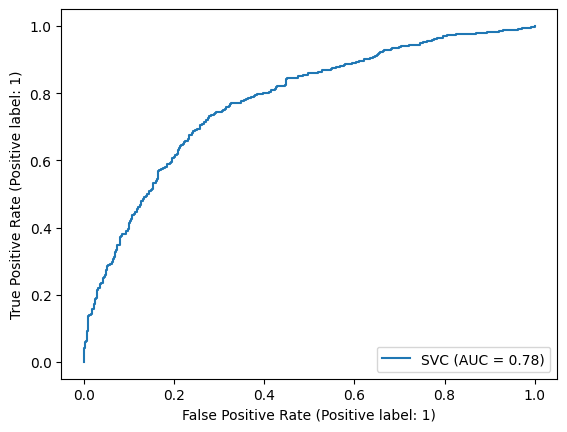

In [90]:
RocCurveDisplay.from_estimator(SVM_met, X_test, y_test)
plt.show()

#### 4.0 Análise do melhor modelo com a utilização da curva ROC (Questão 5)

#### 5.0 Inferência na base original, utilizando os vinhos tintos. (Questão 6)

5.1 Preparação da base da dados

- Separação para vinhos tintos;
- Divisão de treino e teste;
- Padronização.

In [91]:
# X = df_red[['fixed acidity', 'volatile acidity', 'citric acid',
#        'residual sugar', 'chlorides', 'free sulfur dioxide',
#        'total sulfur dioxide']]
# y = df_red['opinion']

In [92]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30, random_state= 42, stratify= y) # 30% do dados para teste

In [93]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

5.2 Inferência

In [94]:
# yhat = SVM_met.predict(X_test)

In [95]:
# result_SVM_2 = avg_kfold_cv(SVM_met, X_train, y_train, k_folds)